In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def initialize_board(n):

   

    # Intializing the board and the center value being 1

    board = np.zeros(( 2*n + 1, 2*n + 1),int)

    board[n][n] = 1

    flag = 1

   

   

    for i in range (1,n+1):

       

        # Moving the index up

        for j in range (0,2*i):

            flag += 1

           

            board[n-j+i-1][n+i] = flag

           

       

       

        # Moving the index left

        for j in range (0,2*i):

            flag += 1

           

            board[n-i][n+i-j-1] = flag

         

           

       

       

        #Moving the index down

        for j in range (0,2*i):

            flag += 1

           

            board[n-i+j+1][n-i] = flag

         

           

       

       

        # Moving the index right

        for j in range (0,2*i):

            flag += 1

           

            board[n+i][n-i+j+1] = flag

         

       

    return board

In [43]:
n=3
initialize_board(n)
matrice_spirale= initialize_board(3)
print(matrice_spirale)

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14
Done in 12 steps


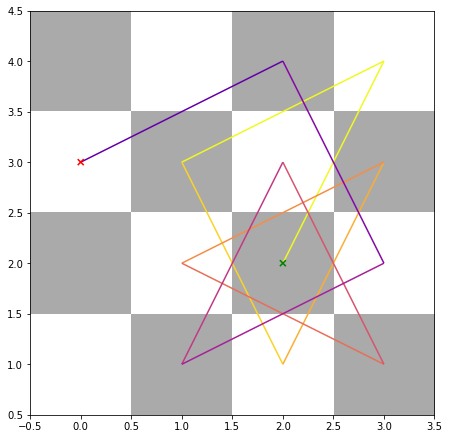

In [42]:


import numpy as np

import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

from matplotlib.colors import ListedColormap

 

DPI = 72

width, height = 700, 525

fig, ax = plt.subplots(figsize=(width/DPI, height/DPI), dpi=DPI)

ax.axis('square')

 

# Set up the grid: a board of 100 x 100 squares is enough.

n = 5

grid = [[0]*n for i in range(n)]

ix, iy = 0, 0

dx, dy = 1, 0

s = 1

i = 0

while i <= n*n:

    for j in range(s):

        i += 1

        try:

            grid[iy+n//2][ix+n//2] = i

        except IndexError:

            break

        ix += dx

        iy += dy

    dx, dy = dy, dx

    if dy:

        dy = -dy

    else:

        s += 1

 

def get_next(iy, ix):

    """Get the position of the next square visited by the knight."""

 

    next_sq = []

    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)

    for dy, dx in moves:

        jy, jx = iy + dy, ix + dx

        if 0 <= jx < n and 0 <= jy < n:

            if (jy, jx) not in visited:

                next_sq.append((jy, jx))

    if not next_sq:

        # No valid moves – we're done: return None

        return

    return min(next_sq, key=lambda e: grid[e[0]][e[1]])

 

# Keep track of the visited squares' indexes in the list visited.

visited = []

iy, ix = n//2, n//2

i = 0

# Run the game until there are no valid moves and print the visited squares.

while True:

    i += 1

    visited.append((iy, ix))

    try:

        iy, ix = get_next(iy, ix)

    except TypeError:

        break

print(', '.join(str(grid[iy][ix]) for iy, ix in visited))

print('Done in {} steps'.format(i))

 

# Plot the path of the knight on a chessboard in a pleasing colour scheme.

points = np.array(visited).reshape(-1, 1, 2)

segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(1, len(visited))

lc = LineCollection(segments, cmap='plasma_r', norm=norm)

lc.set_array(np.array(range(len(visited))))

line = ax.add_collection(lc)

 

ax.scatter([visited[0][0], visited[-1][0]], [visited[0][1], visited[-1][1]],

           c=('g','r'), marker='x', zorder=10)

 

ptp = np.concatenate( (np.min(points[:,:], axis=0),

                       np.max(points[:,:], axis=0)) ).T

 

ax.set_xlim(ptp[0][0]-0.5, ptp[0][1]+0.5)

ax.set_ylim(ptp[1][0]-0.5, ptp[1][1]+0.5)

 

xmin, xmax = ptp[0]

ymin, ymax = ptp[1]

board = np.zeros((ymax-ymin+1, xmax-xmin+1), dtype=int)

board[1::2, ::2] = 1

board[::2, 1::2] = 1

 

cmap = ListedColormap(['#aaaaaa', 'white'])

 

ax.imshow(board, extent=[xmin-0.5,xmax+0.5,ymin-0.5,ymax+0.5], cmap=cmap)

plt.savefig('trapped-knight.png', dpi=DPI)

plt.show()

In [45]:

def matrix(n):

    board = np.zeros(( 2*n + 1, 2*n + 1),int)

    board[n][n] = 1

    flag = 1

    for i in range (1,n+1):

        for j in range (0,2*i):

            flag += 1          

            board[n-j+i-1][n+i] = flag

        for j in range (0,2*i):

            flag += 1

            board[n-i][n+i-j-1] = flag

        for j in range (0,2*i):

            flag += 1

            board[n-i+j+1][n-i] = flag

        for j in range (0,2*i):

            flag += 1

            board[n+i][n-i+j+1] = flag

    return board

 

def walk(board):

     

    reference = len(board)

    c = (reference-1) / 2                        

    current_position = (c,c)

    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)  

    sequence = [board[int(current_position[0]), int(current_position[1])]]      

    x_coordinates = [c]          

    y_coordinates = [c]

    counter_invalid_moves = 0

    while counter_invalid_moves < len(moves):

        temp_min_value_move = pow(reference,2)

 

        for i in range(len(moves)):

 

            temp_x_coordinate_i = int(current_position[0]) + int(moves[i][0])

            temp_y_coordinate_i = int(current_position[1]) + int(moves[i][1])

           

            if ( 0 <= temp_x_coordinate_i < reference ) and ( 0 <=  temp_y_coordinate_i < reference ):

 

                temp_value_at_i_move = board[temp_x_coordinate_i, temp_y_coordinate_i]

 

                if ( temp_value_at_i_move <= temp_min_value_move ) and ( temp_value_at_i_move not in(sequence) ):

                    counter_invalid_moves = 0

                    temp_min_value_move = temp_value_at_i_move

                    i_chosen_move = i

                else:

                    counter_invalid_moves += 1

            else:

                counter_invalid_moves += 1

        if counter_invalid_moves < len(moves):

            temp_x_coordinate_chosen_i = int(current_position[0]) + int(moves[i_chosen_move][0])

            temp_y_coordinate_chosen_i = int(current_position[1]) + int(moves[i_chosen_move][1])

            current_position = (temp_x_coordinate_chosen_i, temp_y_coordinate_chosen_i)  

            if ( 0 <= temp_x_coordinate_i < reference ) and ( 0 <=  temp_y_coordinate_i < reference ):

                sequence.append(board[int(current_position[0]), int(current_position[1])])

                x_coordinates.append(temp_x_coordinate_chosen_i)

                y_coordinates.append(temp_y_coordinate_chosen_i)

    n = int(len(board) / 2)

    for _ in range (len(sequence)):

        x_coordinates[_] -= n

        x_coordinates[_] *= (-1)

        y_coordinates[_] -= n

    return ( sequence, x_coordinates, y_coordinates)

 

   

 

    #fig.set_size_inches(10,10)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializzazione delle posizioni dei giocatori
positions = np.array([0, 20, 40, 60, 80])
directions = np.array([1, 1, 1, 1, -1])  # 1 rappresenta destra, -1 rappresenta sinistra
players = np.array([1, 2, 3, 4, 5])

while True:
    # Muovi i giocatori
    positions += directions

    # Controlla le collisioni
    for i in range(len(players)):
        for j in range(i + 1, len(players)):
            if positions[i] == positions[j]:
                # Se due giocatori si incontrano, inverti le loro direzioni
                directions[i], directions[j] = -directions[j], -directions[i]

    # Controlla le posizioni al di fuori del campo
    for i in range(len(players)):
        if positions[i] < 0 or positions[i] > 100:
            loser = players[i]
            break

    # Se c'è un perdente, esci dal ciclo
    if 'loser' in locals():
        break

print(f"Il giocatore {loser} perde la corsa greca.")

Il giocatore 4 perde la corsa greca.


Player 1 loses.
Total steps: 81


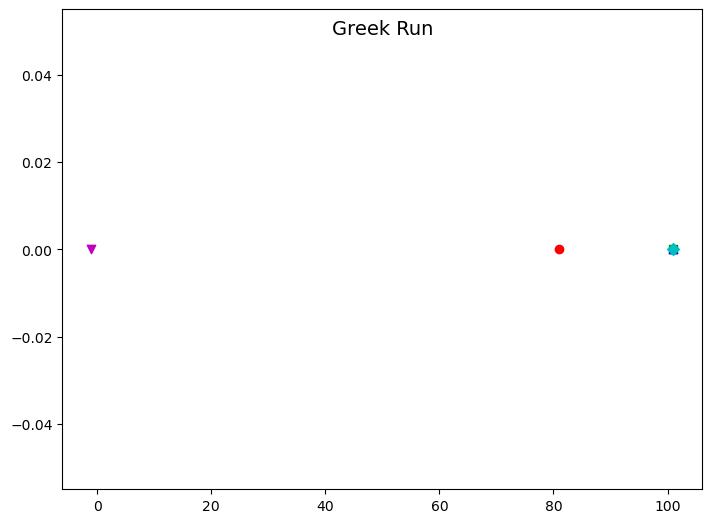

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# Step 1
# Define initial positions, player status, and directions
posizioni = np.array([0, 20, 40, 60, 80])
play = np.array([True, True, True, True, True])
direction = np.array([1, 1, 1, 1, -1])  # 1 for right, -1 for left
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', '^', 'D', 'v']

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
fig.suptitle('Greek Run', fontsize=14)

for x in zip(posizioni, direction, colors, markers):
    ax.scatter(x[0], 0, color=x[2], marker=x[3])

display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(1.0)

# Step 2
step = 0

while len(play[play == True]) != 1:
    step += 1

    for i in range(len(posizioni)):
        if play[i]:
            posizioni[i] += direction[i]

    for i in range(len(posizioni)):
        if play[i]:
            if posizioni[i] < 0 or posizioni[i] > 100:
                play[i] = False

    for i in range(len(posizioni) - 1):
        if play[i]:
            for j in range(i + 1, len(posizioni)):
                if play[j]:
                    if posizioni[i] == posizioni[j]:
                        direction[i], direction[j] = -direction[j], -direction[i]

    # Step 3
    ax.clear()
    for x in zip(posizioni, direction, colors, markers):
        ax.scatter(x[0], 0, color=x[2], marker=x[3])

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)

display.clear_output()
display.display(plt.gcf())
display.clear_output()

# Step 4
last_player = np.where(play == True)[0][0] + 1
print(f"Player {last_player} loses.")
print(f"Total steps: {step}")